In [1]:
# Importing required packages
import pandas as pd

In [2]:
# Reading the input csv cleaned file
# Since some invalid values are available in data - XIMB_raw.csv 
# - Ex: Age: contains alphabets describing age in hindi words, 18+
# Read the data_documentation.txt for details of each shortcut representation of header to original value
ximb_raw = pd.read_csv('XIMB_cleaned.csv')

In [3]:
# Shape is 117 rows with 31 columns
ximb_raw.shape

(117, 31)

In [4]:
# Looking at the sample data of how it looks like
ximb_raw.sample(7)

,Timestamp,name,Age,Gender,Locality,education_level,household_income,employed,app_home_security_awareness,awareness_source,...,pco,ent_mdl_int,loc_pck_gdt_os,loc_pck_gdt_os_gs_cntrl,loc_fr_pck_gdt_os_gs_cntrl,loc_fr_pck_es_gdt_os_gs_cntrl,loc_fr_pck_gdt_os_full_ai,loc_prx_pck_gdt_os_basic,loc_fr_prx_pck_gdt_os_full_ai,loc_prx_pck_gdt_os_gs_cntrl
56,2018/03/15 7:51:19 PM GMT+5:30,Rounak,26,Male,Urban,Graduation,5-10 Lakhs,Yes,Yes,Online,...,4,3,4,5,3,4,3,2,5,4
52,2018/03/15 7:32:42 PM GMT+5:30,NaN,25,Female,Urban,Graduation,10-15 Lakhs,Currently Studying,Yes,Online,...,5,3,3,3,3,3,3,3,3,3
75,2018/03/15 9:09:58 PM GMT+5:30,Arijit Singha Roy,26,Male,Urban,Post Graduation,5-10 Lakhs,No,Yes,Online,...,5,5,4,5,4,3,3,4,5,4
10,2018/03/14 7:20:14 PM GMT+5:30,Soham Datta,25,Male,Urban,Graduation,5-10 Lakhs,No,Yes,Social Media,...,5,2,4,2,2,2,4,3,3,4
9,2018/03/14 7:19:15 PM GMT+5:30,Shatam Patri,23,Male,Urban,Graduation,10-15 Lakhs,Currently Studying,Yes,News and Media Coverage,...,5,5,4,5,3,3,4,3,5,3
47,2018/03/15 7:26:57 PM GMT+5:30,Nikhita,22,Female,Urban,Graduation,0-5 Lakhs,Yes,Yes,Online,...,5,5,4,5,5,4,5,4,5,3
13,2018/03/14 7:44:20 PM GMT+5:30,NaN,22,Male,Urban,Graduation,0-5 Lakhs,Yes,No,I have not heard of that,...,5,5,5,5,5,5,5,5,5,5


In [5]:
# Checking if there are any missing values
missing_values_count = ximb_raw.isnull().sum()

In [6]:
# there are 27 missing names and 1 awareness_source
missing_values_count

Timestamp                         0
name                             27
Age                               0
Gender                            0
Locality                          0
education_level                   0
household_income                  0
employed                          0
app_home_security_awareness       0
awareness_source                  1
vr_assistants_usage               0
vr_assistants_frq                 0
percieve_imp_hm_sec               0
numpad_locking                    0
module_purchase                   0
ent_pack_elc_gdt                  0
vra_support_lvl                   0
pop                               0
qop                               0
ss                                0
sec_contrl_robust                 0
pco                               0
ent_mdl_int                       0
loc_pck_gdt_os                    0
loc_pck_gdt_os_gs_cntrl           0
loc_fr_pck_gdt_os_gs_cntrl        0
loc_fr_pck_es_gdt_os_gs_cntrl     0
loc_fr_pck_gdt_os_full_ai   

In [7]:
# Columns of the csv data file
ximb_raw.columns

Index(['Timestamp', 'name', 'Age', 'Gender', 'Locality', 'education_level',
       'household_income', 'employed', 'app_home_security_awareness',
       'awareness_source', 'vr_assistants_usage', 'vr_assistants_frq',
       'percieve_imp_hm_sec', 'numpad_locking', 'module_purchase',
       'ent_pack_elc_gdt', 'vra_support_lvl', 'pop', 'qop', 'ss',
       'sec_contrl_robust', 'pco', 'ent_mdl_int', 'loc_pck_gdt_os',
       'loc_pck_gdt_os_gs_cntrl', 'loc_fr_pck_gdt_os_gs_cntrl',
       'loc_fr_pck_es_gdt_os_gs_cntrl', 'loc_fr_pck_gdt_os_full_ai',
       'loc_prx_pck_gdt_os_basic', 'loc_fr_prx_pck_gdt_os_full_ai',
       'loc_prx_pck_gdt_os_gs_cntrl'],
      dtype='object')

In [8]:
# Lets do cluster analysis of Age and awareness_source
ximb_raw['awareness_source']

0            Friends and family
1            Friends and family
2            Friends and family
3                  Social Media
4                        Online
5                        Online
6                        Online
7            Friends and family
8       News and Media Coverage
9       News and Media Coverage
10                 Social Media
11                       Online
12                 Social Media
13     I have not heard of that
14           Friends and family
15      News and Media Coverage
16           Friends and family
17                 Social Media
18                       Online
19                       Online
20           Friends and family
21                 Social Media
22                 Social Media
23                       Online
24      News and Media Coverage
25      News and Media Coverage
26                 Social Media
27                       Online
28           Friends and family
29      News and Media Coverage
                 ...           
87      

In [9]:
# Age data
ximb_raw['Age']

0      21
1      31
2      25
3      27
4      25
5      25
6      24
7      22
8      26
9      23
10     25
11     25
12     22
13     22
14     23
15     22
16     21
17     22
18     28
19     22
20     21
21     23
22     23
23     19
24     22
25     22
26     26
27     22
28     26
29     26
       ..
87     25
88     23
89     22
90     24
91     22
92     20
93     24
94     26
95     22
96     24
97     25
98     22
99     25
100    23
101    25
102    23
103    25
104    39
105    24
106    24
107    22
108    28
109    24
110    23
111    25
112    22
113    27
114    25
115    24
116    23
Name: Age, Length: 117, dtype: int64

In [10]:
# Importing KMeans for cluster analysis
from sklearn.cluster import KMeans

In [11]:
# Label encoder for converting categorical(string) data to numerical(float) data format for analysis
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
ximb_raw['awareness_source'] = ximb_raw['awareness_source'].astype(str)
ximb_raw['awareness_source'] = le.fit_transform(ximb_raw['awareness_source'])

In [13]:
# Retrieving only Age and awareness_source from original raw data (dataframe)
age_awareness_src = ximb_raw[['Age', 'awareness_source']]

In [14]:
# datatype is pandas DataFrame
type(age_awareness_src)

pandas.core.frame.DataFrame

In [15]:
# Converting the dataframe into numpy ndaarray
age_awareness_np_matrx = age_awareness_src.as_matrix()
# now the type is numpy ndarray
type(age_awareness_np_matrx)

numpy.ndarray

In [16]:
# Running kmeans clustering of 4 clusters, since there are 4 different labels in awareness_source
kmeans = KMeans(n_clusters=4, random_state=0).fit(age_awareness_np_matrx)

In [17]:
kmeans.labels_

array([2, 3, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0,
       0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2], dtype=int32)

In [18]:
# Importing matplotlib for plotting and visualization
import matplotlib.pyplot as plt

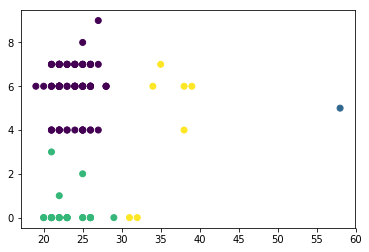

In [19]:
# Doing the scatter plot
plt.scatter(age_awareness_np_matrx[:, 0], age_awareness_np_matrx[:, 1], c=kmeans.labels_, cmap='viridis')